In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Visualizing the data

In [2]:
df_x_train = pd.read_csv('Linear_X_Train.csv')
df_y_train = pd.read_csv('Linear_Y_Train.csv')

In [3]:
df_x_train.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [4]:
df_y_train.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [5]:
X = df_x_train.values
Y = df_y_train.values

print(X.shape)
print(Y.shape)

(3750, 1)
(3750, 1)


# Normalizing the data

In [6]:
mean = X.mean()
std = X.std()
print(mean)
print(std)

-0.03779466168006855
0.9920801322508517


In [7]:
X = (X-mean)/std

In [8]:
new_mean = X.mean()
new_std = X.std()
print(new_mean)
print(new_std)

3.789561257387201e-18
1.0


# Linear Regression

In [42]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)
    

def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
   
    for i in range(max_steps):
        
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
           
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list

In [43]:
theta,error_list,theta_list=gradientDescent(X,Y)


In [44]:
theta

array([ 0.6838508 , 79.90361453])

In [45]:
error_list

[6576.35005246196,
 5363.125102574931,
 4380.412893166487,
 3584.4160035456366,
 2939.658522952752,
 2417.404963672508,
 1994.3795806555281,
 1651.7290204117544,
 1374.1820666143055,
 1149.3690340383696,
 967.2704776518652,
 819.770646978796,
 700.2957841336078,
 603.5211452290067,
 525.1336877162773,
 461.6398471309694,
 410.20983625687,
 368.55152744884856,
 334.80829731435097,
 307.47628090540843,
 285.33734761416457,
 267.4048116482566,
 252.87945751587242,
 241.11392066864,
 231.5838358223823,
 223.86446709691373,
 217.61177842928484,
 212.54710060850397,
 208.4447115736724,
 205.1217764554589,
 202.43019900970543,
 200.25002127864602,
 198.48407731648712,
 197.05366270713802,
 195.8950268735658,
 194.95653184837263,
 194.19635087796493,
 193.58060429193594,
 193.08184955725244,
 192.67785822215873,
 192.35062524073192,
 192.08556652577707,
 191.87086896666273,
 191.69696394378104,
 191.55610087524585,
 191.4420017897342,
 191.34958153046787,
 191.2747211204641,
 191.2140841883591

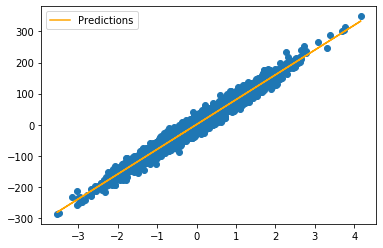

In [47]:
y_ = hypothesis(X,theta)
plt.scatter(X,Y)
plt.plot(X,y_,color='orange',label='Predictions')
plt.legend()
plt.show()

# Testing the data

In [49]:
df_x_test = pd.read_csv('Linear_X_Test.csv')
df_x_test.head()

,x
0,-1.877944
1,-0.869032
2,-2.530182
3,2.760205
4,0.591000


In [50]:
X_Test = df_x_test.values
print(X_Test.shape)

(1250, 1)


In [51]:
mean = X.mean()
std = X.std()
print(mean)
print(std)


3.789561257387201e-18
1.0


In [53]:
tx = X_Test.shape[0]

with open('file.csv','w') as f:
    heading = 'y'+'\n'
    f.write(heading)
    
    for i in range(tx):
        yp = theta[0] + theta[1]*X_Test[i]
        row = str(yp)[1:-1] + '\n'
        f.write(row)
    